In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
sns.set_style('whitegrid')

In [4]:
titanic = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
titanic = pd.read_csv('/kaggle/input/titanic/test.csv')
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.dropna().describe
#누락값 없애고 출력

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                 

In [8]:
titanic.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [9]:
titanic.mad()

PassengerId    222.749719
Survived         0.473013
Pclass           0.761968
Age             11.322944
SibSp            0.713780
Parch            0.580742
Fare            28.163692
dtype: float64

In [10]:
titanic.groupby('Pclass').count()
# '클래스'별로 몇 명이 탔을까?

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


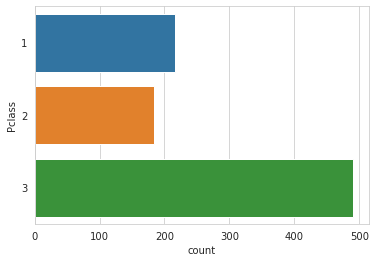

In [11]:
sns.countplot(y='Pclass', data=titanic)
plt.show()

> 위에서 표로 표현된 동일한 데이터를 시각적으로 확인한다.
>확실히 3등급 탑승객의 수가 월등히 높다.

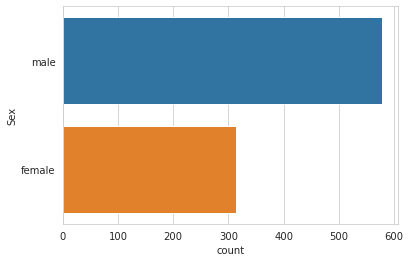

In [12]:
sns.countplot(y='Sex', data=titanic)
plt.show()

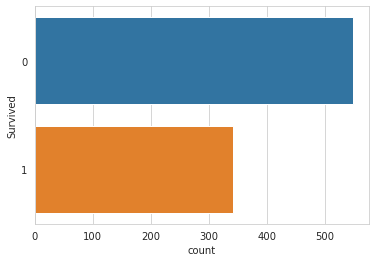

In [13]:
sns.countplot(y='Survived', data=titanic)
plt.show()


In [14]:
titanic.groupby('Pclass').std()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,246.737616,0.484026,14.802856,0.611898,0.693997,78.380373
2,250.852161,0.500623,14.001077,0.601633,0.690963,13.417399
3,264.441453,0.428949,12.495398,1.374883,0.888861,11.778142


In [15]:
titanic.groupby('Pclass')['Fare'].median()


Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [16]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [17]:
titanic.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [18]:
# fem_sur = titanic(titanic['survived'] == 1)
#코드 짜보려했으나 실패..

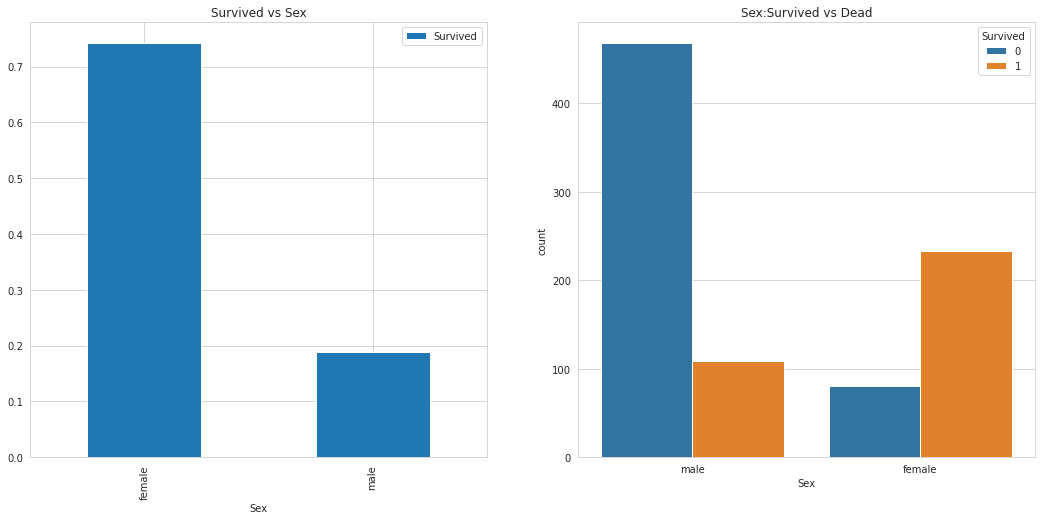

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [20]:
titanic.groupby('Pclass')['Age'].describe()
#클래스별로 나이를 확인한다.

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [21]:
titanic.groupby('Sex')['Age'].agg([min,np.median,max])

,min,median,max
Sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [22]:
titanic.query("Age>30").groupby('Pclass').median()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,494,1,45.0,0,0,56.9292
2,451,0,39.0,0,0,14.0000
3,520,0,38.0,0,0,8.0500


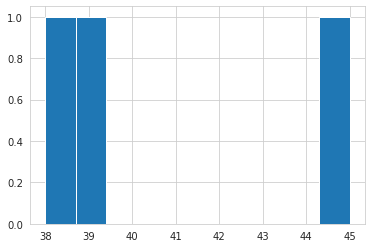

In [23]:
df = titanic.query("Age>30").groupby('Pclass').median()
plt.hist(df[df.Age >= 30]["Age"])
plt.show()

In [24]:
titanic.query("Fare <20").groupby('Pclass').median()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,811.5,0.0,38.5,0.0,0.0,0.0000
2,416.0,0.0,30.0,0.0,0.0,13.0000
3,442.0,0.0,25.0,0.0,0.0,7.8958


In [25]:
titanic.groupby(['Pclass','Sex'])['Age'].mean().unstack()

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


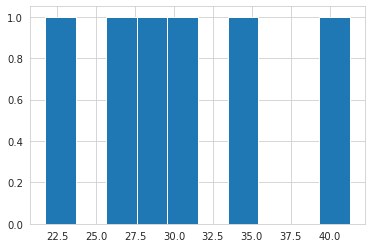

In [26]:
plt.hist(titanic.groupby(['Pclass','Sex'])['Age'].mean())
plt.show()

> 히스토그램으로 표현해보았으나, 뭔가 원하는 형태가 아니었다.

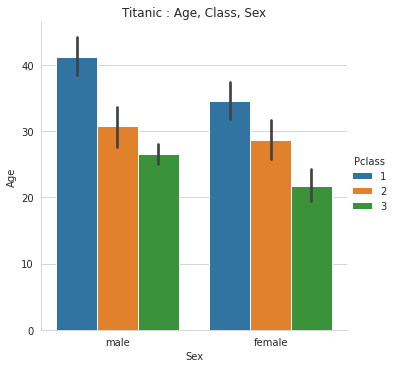

In [27]:
sns.catplot(x='Sex', y='Age', hue='Pclass', kind='bar', data=titanic)
plt.title("Titanic : Age, Class, Sex")
plt.show()

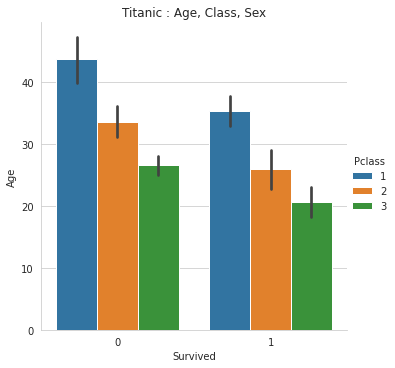

In [28]:
sns.catplot(x='Survived', y='Age', hue='Pclass', kind='bar', data=titanic)
plt.title("Titanic : Age, Class, Sex")
plt.show()

In [29]:
titanic.groupby(['Pclass','Sex'])['Fare'].mean().unstack()

Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


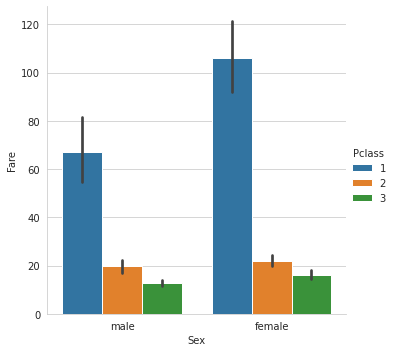

In [30]:
sns.catplot(x='Sex', y='Fare', hue='Pclass', kind='bar', data=titanic)
plt.show()

In [31]:
titanic.groupby(['Pclass','Sex'])['Survived'].mean().unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


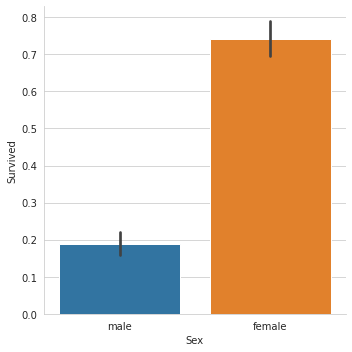

In [32]:
sns.catplot(x='Sex', y='Survived', kind='bar', data=titanic)
plt.show()

In [33]:
titanic.pivot_table('Survived', index='Pclass', columns='Sex')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


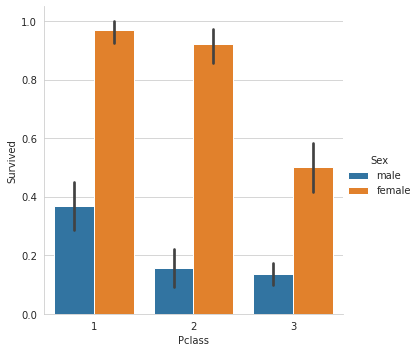

In [34]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=titanic)
plt.show()

In [35]:
age = pd.cut(titanic['Age'],[0, 18, 40, 80])
titanic.pivot_table('Survived',['Sex', age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [36]:
Fare = pd.qcut(titanic['Fare'],3)
titanic.pivot_table('Survived',['Sex', age],[Fare, 'Pclass'])


Fare            (-0.001, 8.662]           (8.662, 26.0]                      \
Pclass                        1         3             1         2         3   
Sex    Age                                                                    
female (0, 18]              NaN  0.700000           NaN  1.000000  0.583333   
       (18, 40]             NaN  0.550000           NaN  0.894737  0.461538   
       (40, 80]             NaN  0.000000           1.0  0.818182  0.250000   
male   (0, 18]              NaN  0.166667           NaN  0.500000  0.500000   
       (18, 40]             0.0  0.138462           NaN  0.078431  0.114286   
       (40, 80]             NaN  0.074074           0.0  0.111111  0.000000   

Fare            (26.0, 512.329]                 
Pclass                        1    2         3  
Sex    Age                                      
female (0, 18]         0.909091  1.0  0.111111  
       (18, 40]        0.979167  1.0  0.250000  
       (40, 80]        0.958333  1.0  0.000000  
male   (0, 18]         0.800000  0.8  0.052632  
       (18, 40]        0.523810  0.0  0.500000  
       (40, 80]        0.291667  0.0       NaN

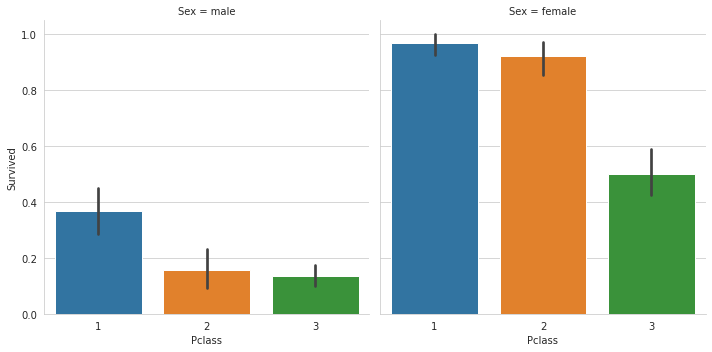

In [37]:
sns.catplot(x='Pclass', y='Survived', col='Sex', kind='bar', data=titanic)
plt.show()

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [59]:
tit_class=titanic['Pclass']
tit_class

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [60]:
tit_price = titanic['Fare']
tit_price

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64